
# TASK 2 (Data analysis)

### In this task, use your data analytics skills to answer the question posed in the Task 1. Depending upon your chosen question, you will typically have to perform Exploratory Data Analysis (EDA), data pre-processing, statistics-based data analysis, data visualisation and use unsupervised machine learning algorithms (e.g., clustering).

### Business Analytical Question:  What are the key determinants of pricing for Airbnb listings in NYC? How do factors like location, property type, and reviews influence the price?



<a id = "table-of-content"></a>
# Table of Content

- [Business Understanding](#business_undestanding)
- [Data Understanding](#data_undestanding)
- [Data Preparation](#data_preparation)
- [Modelling and Evaluation](#modelling_n_evaluation)
- [Conclusion](#conclusion)

[link text](https:// [link text](https://))<a id = "business_undestanding"></a>
# Business Understanding
What are the key determinants of pricing for Airbnb listings in NYC? How do factors like location, property type, and reviews influence the price?

<a id = "data_understanding"></a>
# Data Understanding
Here we will look at the data and hopefully find interesting patterns in it.

We will try and see if the columns below have a strong correlation to the *price*:

* name - Looks like a description
* neighbourhood_group
* neighbourhood 
* latitude 
* longitude 
* room_type 
* price
* minimum_nights 
* number_of_reviews 
* last_review
* reviews_per_month 
* calculated_host_listings_count
* availability_365


In [45]:
#import pandas and numpy for data preprocessing and manipulation

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Set the aesthetics for the plots
sns.set(style="whitegrid")

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [46]:
# mounting google drive and loading csv file into dataframe

# folder_path = '/content/drive/MyDrive/TeamProject/AB_NYC_2019.csv'
folder_path = '/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv'

# from google.colab import drive
# drive.mount('/content/drive')

df = pd.read_csv(folder_path)
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [47]:
#inspect data
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [48]:
#number of rows and columns
df.shape

(48895, 16)

In [49]:
#column names
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [50]:
#check data types
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Numerical columns

In [51]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64


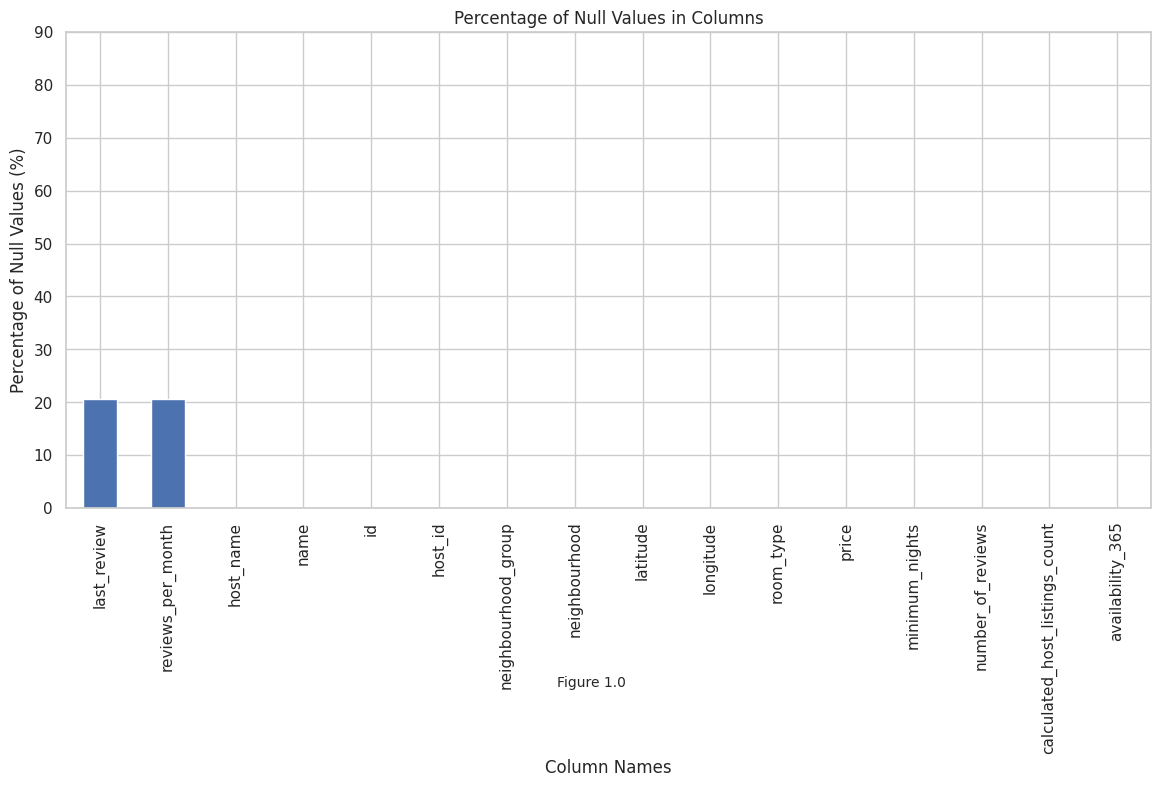

In [52]:
# Calculate the percentage of null values for each column
total_rows = len(df)
null_counts = df.isnull().sum()

# Sort the columns in descending order of null value counts
sorted_null_counts = null_counts.sort_values(ascending=False)

# Select top 20 columns
top_20_null_counts = sorted_null_counts.head(20)

# Calculate percentage for these top 20 columns
top_20_null_percentage = (top_20_null_counts / total_rows) * 100

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
top_20_null_percentage.plot(kind='bar')
ax.set_title('Percentage of Null Values in Columns')
ax.set_ylabel('Percentage of Null Values (%)')
ax.set_xlabel('Column Names')
ax.set_yticks(np.arange(0, 100, 10))
#Add caption
fig.subplots_adjust(bottom=0.2)  # Adjust the bottom margin to make space for the caption
fig.text(0.5, -0.05, "Figure 1.0", ha='center', va='center', fontsize=10, wrap=True)
plt.show()

In [53]:
# Handling missing values
df['name'].fillna('Unknown', inplace=True) #replace missing names with 'unknown'
df['host_name'].fillna('Unknown', inplace=True) #replace missing host names with 'unknown'
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')  # Convert to datetime
df['last_review'].fillna(pd.Timestamp('1900-01-01'), inplace=True)  # Placeholder for no reviews
df['reviews_per_month'].fillna(0, inplace=True)  # Replacing no reviews with 0


In [54]:
#check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


<Axes: >

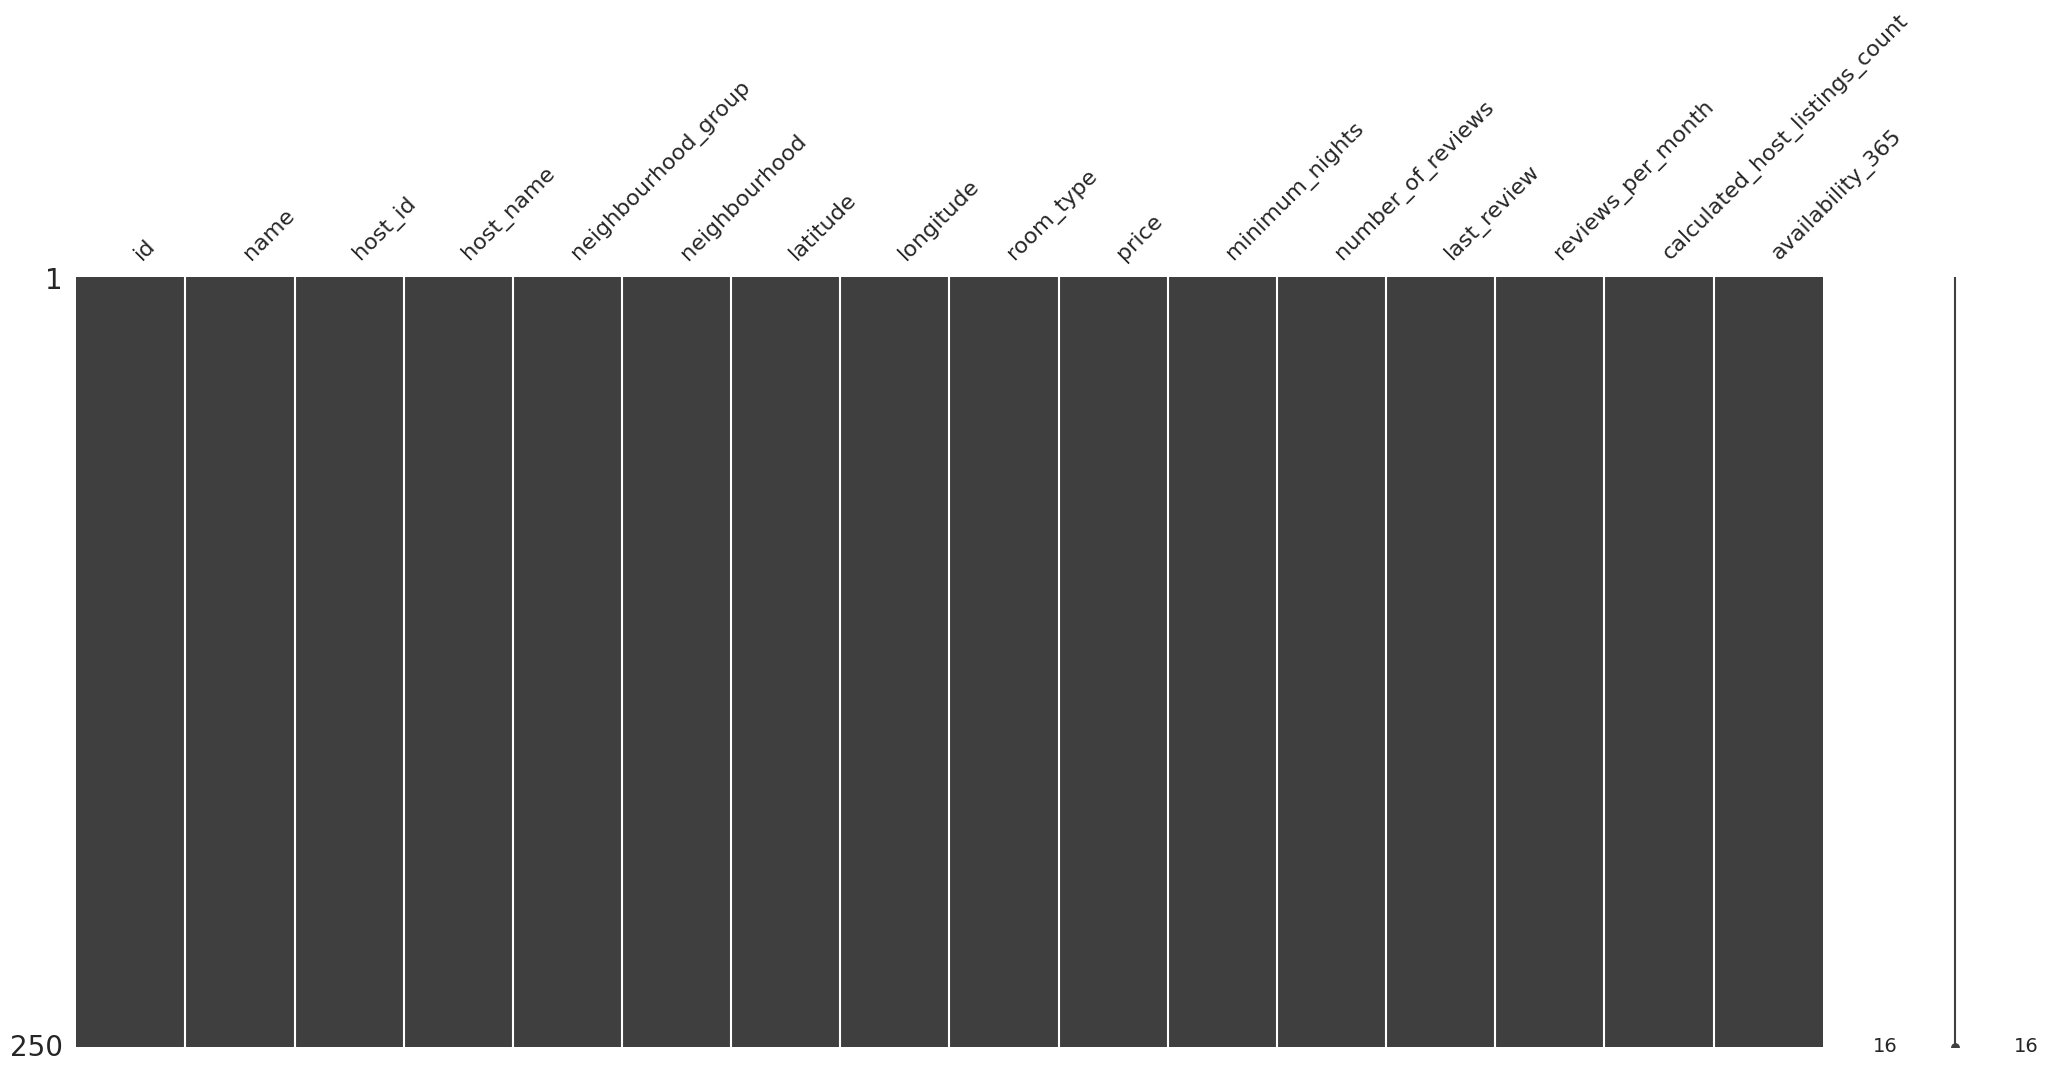

In [55]:
msno.matrix(df.sample(250))

/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

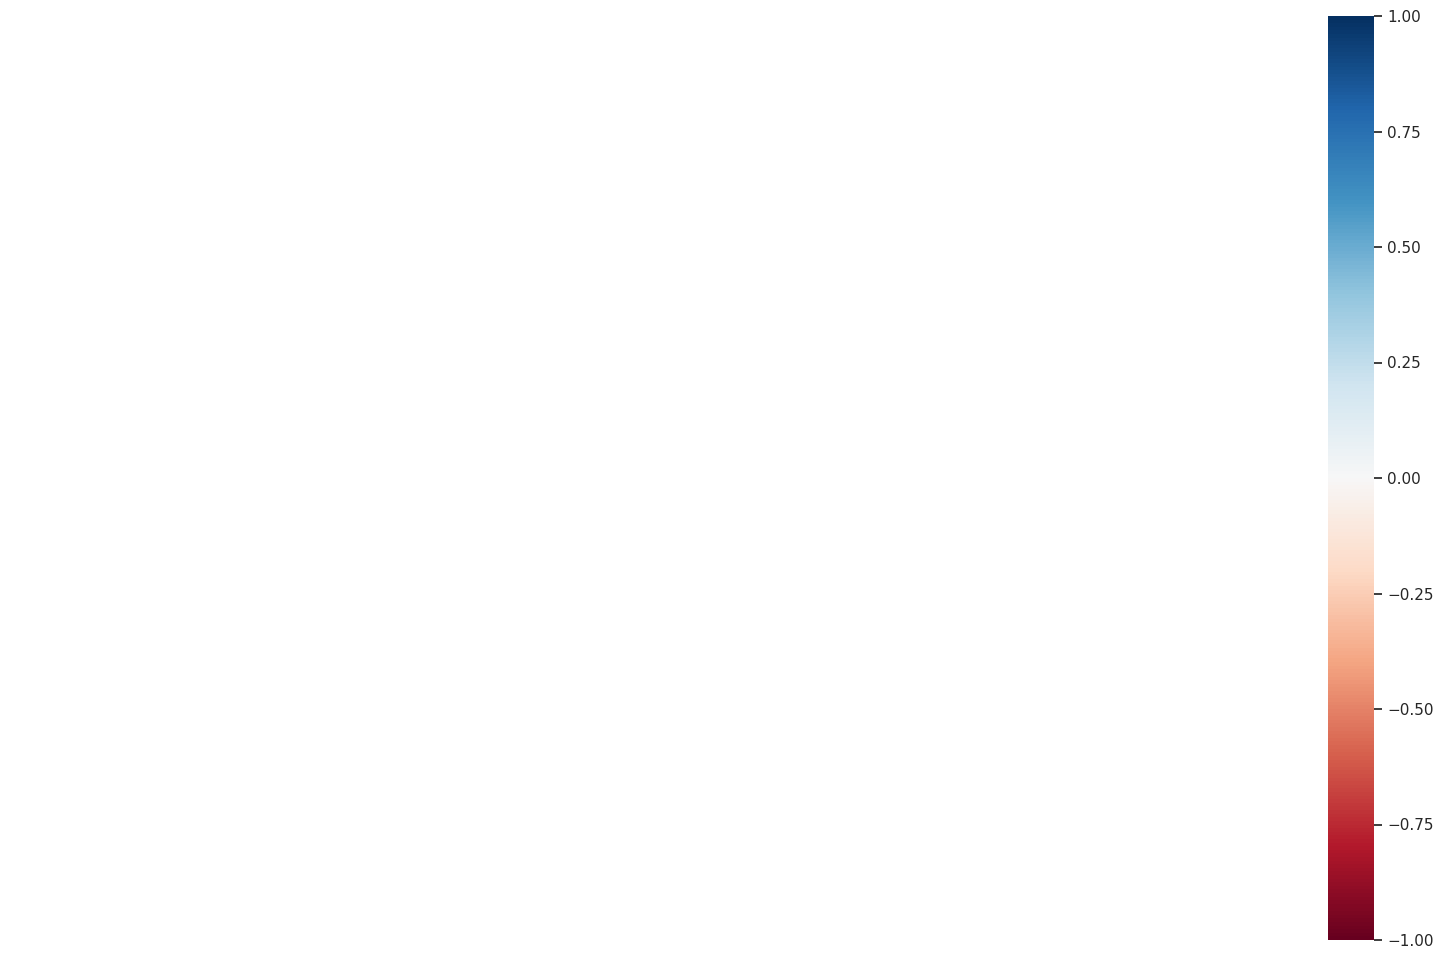

In [56]:
msno.heatmap(df)

## Univariate Analysis

### Price
Looks like we have some prices that are 0. It does not make sense why prices for a listing should be zero so imputing might be necessary.
If imputing is required then I propose using an unsupervised imputing like KNN.

In [57]:
df[df['price'] <= 0].size

176

In [58]:
df[df['price'] <= 0].sort_values(by='price', ascending=True)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,1900-01-01,0.00,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


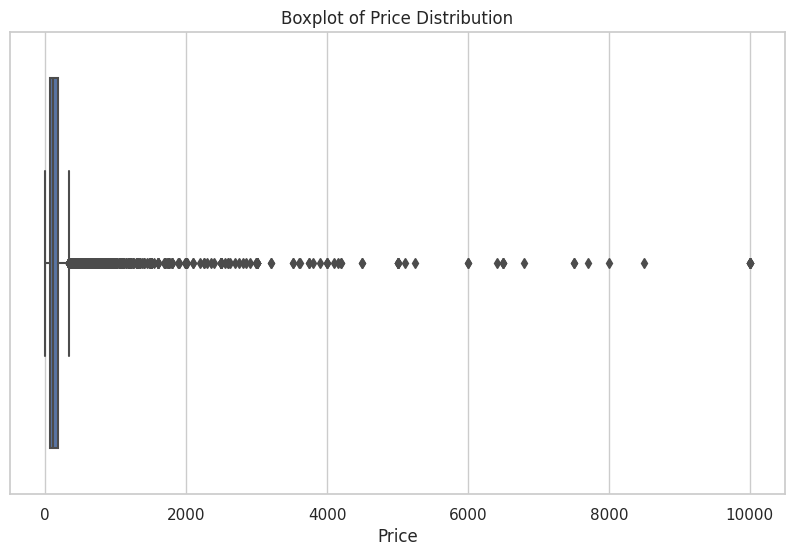

In [59]:
#Distribution of Prices,
# Create a boxplot for the price distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price Distribution')
plt.xlabel('Price')
plt.show()

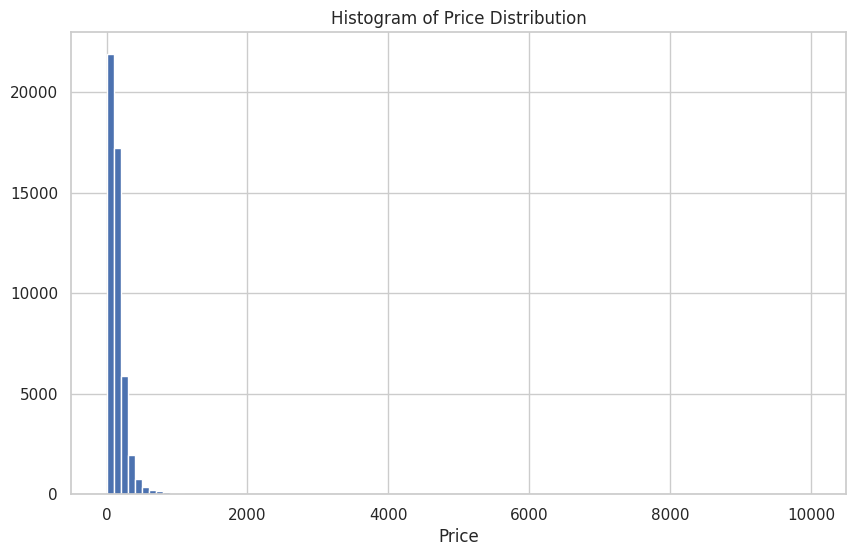

In [60]:
# Create a boxplot for the price distribution
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=100)
plt.title('Histogram of Price Distribution')
plt.xlabel('Price')
plt.show()

In [61]:
df['normalised_price'] = np.log(df['price'])
# Create a boxplot for the price distribution
# plt.figure(figsize=(10, 6))
# plt.hist(df['normalised_price'], bins=10)
# plt.title('Histogram of Normalized Price Distribution')
# plt.xlabel('Normalised Price')
# plt.show()
df['normalised_price'].min()

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


-inf

### Room Types

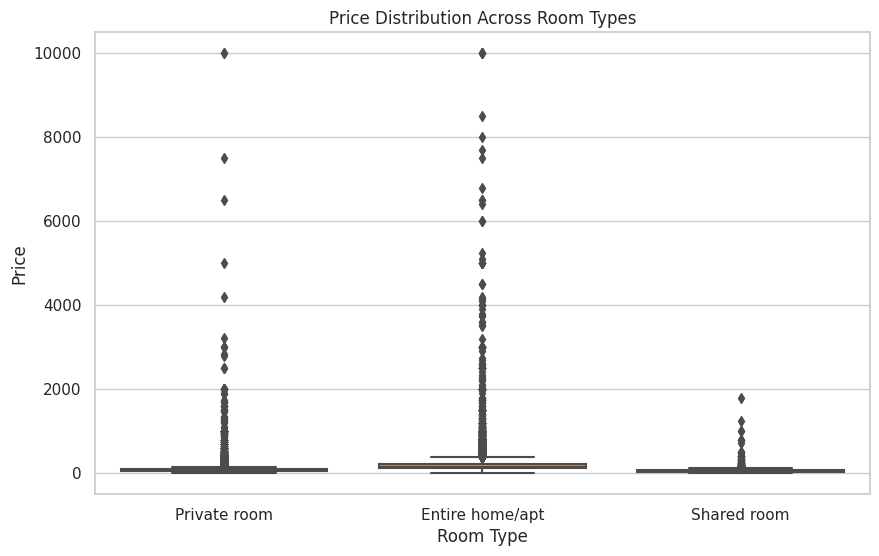

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution Across Room Types')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [67]:
#Extract numerical features for examination
numeric_df = df.select_dtypes(include=[np.number])
num_columns = numeric_df.columns

##Extract categorical features for examination
categorical_df = df.select_dtypes(include=['O', 'object'])
cat_columns = categorical_df.columns

In [68]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,normalised_price
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,5.003946
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5.416100
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1900-01-01,0.00,1,365,5.010635
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,4.488636
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,4.382027


### Name
This is just column that describes the bnb. Not sure any univariate analysis can be performed on this.

In [70]:
df.head(50)['name']

0                    Clean & quiet apt home by the park
1                                 Skylit Midtown Castle
2                   THE VILLAGE OF HARLEM....NEW YORK !
3                       Cozy Entire Floor of Brownstone
4      Entire Apt: Spacious Studio/Loft by central park
5             Large Cozy 1 BR Apartment In Midtown East
6                                       BlissArtsSpace!
7                      Large Furnished Room Near B'way 
8                    Cozy Clean Guest Room - Family Apt
9                    Cute & Cozy Lower East Side 1 bdrm
10                     Beautiful 1br on Upper West Side
11                      Central Manhattan/near Broadway
12       Lovely Room 1, Garden, Best Area, Legal rental
13     Wonderful Guest Bedroom in Manhattan for SINGLES
14                        West Village Nest - Superhost
15                     Only 2 stops to Manhattan studio
16                    Perfect for Your Parents + Garden
17                                      Chelsea 

### Neighbourhood Group

### Neighbourhood 

### Latitude and Longitude 


### Room Type 

### Minimum Nights 

### Number of Reviews 


### Last Review

### Reviews per Month 


### Calculated Host Listings Count


### Availability 365

## Bivariate Analysis